This is a simple example of how the various parts of the package can be combined to learn a sampling pattern.

In [1]:
%pylab inline
from bilevelmri.experiment_setup import learn, compute_statistics
from bilevelmri.linear_ops.gradients import Grad
from bilevelmri.functionals import Smoothed1Norm
from bilevelmri.loss_functions import least_squares
from bilevelmri.penalty_functions import l1_disc_penalty
from bilevelmri.parametrisations import alpha_parametrisation, free_parametrisation

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch

torch.set_default_dtype(torch.float64)

In [3]:
x = torch.zeros(1, 32, 32, 2)
x[0, 8:24, 8:24, 0] = 1.
y = torch.fft(x, signal_ndim=2, normalized=True) + 0.03 * torch.randn_like(x)
data = {'x': x, 'y': y}
n1, n2 = x.shape[1:3]

In [4]:
params = {
    'model': {
        'n1': n1,
        'n2': n2
    },
    'alg_params': {
        'll_sol': {
            'maxit': 1000,
            'tol': 1e-10
        },
        'lin_sys': {
            'maxit': 1000,
            'tol': 1e-6
        },
        'LBFGSB': {
            'maxit': 1000,
            'pgtol': 1e-8
        }
    }
}

A = Grad()
reg_func = Smoothed1Norm(gamma=1e-2)


def penalty(p):
    return l1_disc_penalty(p[:-2], beta=(.1, .1))

In [5]:
# tune alpha on full sampling pattern to get initialisation
tuned_alpha = learn(data, 1e-3, [(0, np.inf)], alpha_parametrisation, A,
                    reg_func, least_squares, lambda p: torch.zeros_like(p),
                    params)

Learning sampling pattern:
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 2.54e-04
Iteration 250: Relative error: 6.45e-09
Finishing at iteration 295: Relative error: 8.83e-11
CG converged within tolerance 1.00e-06 at iteration 4: relative error was 4.72e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 4.32e-04
Iteration 250: Relative error: 5.21e-05
Iteration 375: Relative error: 7.60e-06
Iteration 500: Relative error: 1.18e-06
Iteration 625: Relative error: 1.88e-07
Iteration 750: Relative error: 3.08e-08
Iteration 875: Relative error: 5.13e-09
Iteration 1000: Relative error: 8.66e-10
CG converged within tolerance 1.00e-06 at iteration 68: relative error was 8.74e-07

Iteration #1: Current sampling rate 100.0%, alpha 6.89e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 2.44e-04
Iteration 250: Relative error: 1.76e-05
Iteration 37

In [6]:
tuned_alpha

{'elapsed_time': datetime.timedelta(seconds=13, microseconds=556156),
 'p': array([0.03776447]),
 'info': {'grad': array([-4.99921074e-11]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 12,
  'nit': 8,
  'warnflag': 0}}

In [7]:
p_init = np.ones(n1 * n2 + 2)
p_init[-1] = 1e-2
p_init[-2] = tuned_alpha['p']
p_bounds = [(0., 1.) for _ in range(n1 * n2)]
p_bounds.append((0, np.inf))
p_bounds.append((1e-2, 1e-2))
# learn sampling pattern
result = learn(data, p_init, p_bounds, free_parametrisation, A, reg_func,
               least_squares, penalty, params)

stats = compute_statistics(data, result['p'], A, reg_func, free_parametrisation, params)

Learning sampling pattern:
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 1.25e-04
Iteration 250: Relative error: 4.75e-06
Iteration 375: Relative error: 2.63e-07
Iteration 500: Relative error: 1.72e-08
Iteration 625: Relative error: 1.23e-09
Finishing at iteration 747: Relative error: 1.00e-10
CG converged within tolerance 1.00e-06 at iteration 49: relative error was 7.63e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 1.25e-04
Iteration 250: Relative error: 4.75e-06
Iteration 375: Relative error: 2.63e-07
Iteration 500: Relative error: 1.72e-08
Iteration 625: Relative error: 1.23e-09
Finishing at iteration 747: Relative error: 1.00e-10
CG converged within tolerance 1.00e-06 at iteration 49: relative error was 7.63e-07

Iteration #1: Current sampling rate 100.0%, alpha 3.78e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 1.25e-04

Iteration 125: Relative error: 9.63e-04
Iteration 250: Relative error: 1.81e-04
Iteration 375: Relative error: 5.16e-05
Iteration 500: Relative error: 2.24e-05
Iteration 625: Relative error: 1.18e-05
Iteration 750: Relative error: 7.50e-06
Iteration 875: Relative error: 5.28e-06
Iteration 1000: Relative error: 3.75e-06
CG converged within tolerance 1.00e-06 at iteration 225: relative error was 9.57e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.07e-04
Iteration 250: Relative error: 2.80e-05
Iteration 375: Relative error: 4.45e-06
Iteration 500: Relative error: 8.92e-07
Iteration 625: Relative error: 1.93e-07
Iteration 750: Relative error: 4.35e-08
Iteration 875: Relative error: 1.00e-08
Iteration 1000: Relative error: 2.35e-09
CG converged within tolerance 1.00e-06 at iteration 94: relative error was 9.05e-07

Iteration #8: Current sampling rate 99.9%, alpha 1.08e-01, eps 1.00e-02
Solver for lower level problem running on minibatch of

Iteration 500: Relative error: 1.79e-08
Iteration 625: Relative error: 8.77e-10
Finishing at iteration 717: Relative error: 9.85e-11
CG converged within tolerance 1.00e-06 at iteration 95: relative error was 8.97e-07

Iteration #17: Current sampling rate 46.0%, alpha 2.52e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.64e-04
Iteration 250: Relative error: 7.52e-06
Iteration 375: Relative error: 2.34e-07
Iteration 500: Relative error: 8.46e-09
Iteration 625: Relative error: 3.40e-10
Finishing at iteration 674: Relative error: 9.79e-11
CG converged within tolerance 1.00e-06 at iteration 94: relative error was 9.03e-07

Iteration #18: Current sampling rate 46.0%, alpha 2.23e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 2.53e-04
Iteration 250: Relative error: 3.25e-06
Iteration 375: Relative error: 6.53e-08
Iteration 500: Relative error: 1.53e-09
Finishing at i

Iteration 750: Relative error: 4.88e-10
Finishing at iteration 830: Relative error: 9.84e-11
CG converged within tolerance 1.00e-06 at iteration 96: relative error was 8.62e-07

Iteration #32: Current sampling rate 44.6%, alpha 3.46e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.71e-04
Iteration 250: Relative error: 2.58e-05
Iteration 375: Relative error: 1.55e-06
Iteration 500: Relative error: 1.20e-07
Iteration 625: Relative error: 1.05e-08
Iteration 750: Relative error: 9.69e-10
Finishing at iteration 872: Relative error: 9.87e-11
CG converged within tolerance 1.00e-06 at iteration 99: relative error was 9.98e-07

Iteration #33: Current sampling rate 44.5%, alpha 4.03e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 7.10e-04
Iteration 250: Relative error: 2.99e-05
Iteration 375: Relative error: 1.95e-06
Iteration 500: Relative error: 1.68e-07
Iteration 625:

Iteration 250: Relative error: 7.06e-06
Iteration 375: Relative error: 1.38e-07
Iteration 500: Relative error: 3.02e-09
Finishing at iteration 615: Relative error: 9.96e-11
CG converged within tolerance 1.00e-06 at iteration 97: relative error was 9.00e-07

Iteration #44: Current sampling rate 19.0%, alpha 1.59e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.56e-04
Iteration 250: Relative error: 3.24e-06
Iteration 375: Relative error: 3.95e-08
Iteration 500: Relative error: 5.75e-10
Finishing at iteration 553: Relative error: 9.95e-11
CG converged within tolerance 1.00e-06 at iteration 96: relative error was 9.08e-07

Iteration #45: Current sampling rate 18.9%, alpha 1.28e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.54e-04
Iteration 250: Relative error: 3.20e-06
Iteration 375: Relative error: 3.88e-08
Iteration 500: Relative error: 5.61e-10
Finishing at i

Iteration 250: Relative error: 9.44e-07
Iteration 375: Relative error: 6.03e-09
Finishing at iteration 478: Relative error: 9.97e-11
CG converged within tolerance 1.00e-06 at iteration 80: relative error was 9.27e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 2.59e-04
Iteration 250: Relative error: 3.96e-07
Iteration 375: Relative error: 5.07e-09
Finishing at iteration 489: Relative error: 9.96e-11
CG converged within tolerance 1.00e-06 at iteration 68: relative error was 6.37e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 2.69e-04
Iteration 250: Relative error: 6.51e-07
Iteration 375: Relative error: 8.81e-09
Iteration 500: Relative error: 1.23e-10
Finishing at iteration 507: Relative error: 9.68e-11
CG converged within tolerance 1.00e-06 at iteration 65: relative error was 8.13e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 2.70e-04
Ite

CG converged within tolerance 1.00e-06 at iteration 109: relative error was 8.87e-07

Iteration #71: Current sampling rate 9.2%, alpha 1.17e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.81e-04
Iteration 250: Relative error: 4.82e-06
Iteration 375: Relative error: 6.13e-08
Iteration 500: Relative error: 8.89e-10
Finishing at iteration 566: Relative error: 9.94e-11
CG converged within tolerance 1.00e-06 at iteration 110: relative error was 9.03e-07

Iteration #72: Current sampling rate 9.2%, alpha 1.25e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 7.86e-04
Iteration 250: Relative error: 6.81e-06
Iteration 375: Relative error: 1.05e-07
Iteration 500: Relative error: 1.87e-09
Finishing at iteration 593: Relative error: 9.93e-11
CG converged within tolerance 1.00e-06 at iteration 111: relative error was 9.65e-07

Iteration #73: Current sampling rate 9.2%, alpha

Iteration 250: Relative error: 9.77e-07
Iteration 375: Relative error: 3.42e-09
Finishing at iteration 457: Relative error: 9.47e-11
CG converged within tolerance 1.00e-06 at iteration 106: relative error was 9.02e-07

Iteration #88: Current sampling rate 8.9%, alpha 7.49e-03, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 4.04e-04
Iteration 250: Relative error: 1.71e-06
Iteration 375: Relative error: 1.12e-08
Finishing at iteration 491: Relative error: 1.00e-10
CG converged within tolerance 1.00e-06 at iteration 109: relative error was 8.60e-07

Iteration #89: Current sampling rate 8.9%, alpha 8.96e-03, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 7.02e-04
Iteration 250: Relative error: 5.81e-06
Iteration 375: Relative error: 7.74e-08
Iteration 500: Relative error: 1.06e-09
Finishing at iteration 572: Relative error: 9.82e-11
CG converged within tolerance 1.00e-06 at

CG converged within tolerance 1.00e-06 at iteration 114: relative error was 9.91e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.25e-04
Iteration 250: Relative error: 2.93e-07
Iteration 375: Relative error: 3.79e-10
Finishing at iteration 402: Relative error: 9.99e-11
CG converged within tolerance 1.00e-06 at iteration 108: relative error was 9.94e-07

Iteration #103: Current sampling rate 8.6%, alpha 5.06e-03, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.48e-04
Iteration 250: Relative error: 1.84e-07
Iteration 375: Relative error: 1.93e-10
Finishing at iteration 388: Relative error: 9.66e-11
CG converged within tolerance 1.00e-06 at iteration 113: relative error was 9.89e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.29e-04
Iteration 250: Relative error: 2.63e-07
Iteration 375: Relative error: 2.58e-10
Finishing at iterat

CG converged within tolerance 1.00e-06 at iteration 106: relative error was 9.55e-07

Iteration #117: Current sampling rate 8.3%, alpha 8.20e-03, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.61e-04
Iteration 250: Relative error: 3.48e-07
Iteration 375: Relative error: 4.73e-10
Finishing at iteration 408: Relative error: 9.90e-11
CG converged within tolerance 1.00e-06 at iteration 114: relative error was 8.88e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 4.14e-04
Iteration 250: Relative error: 1.00e-06
Iteration 375: Relative error: 2.39e-09
Finishing at iteration 454: Relative error: 9.61e-11
CG converged within tolerance 1.00e-06 at iteration 107: relative error was 9.79e-07

Iteration #118: Current sampling rate 8.3%, alpha 6.93e-03, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 2.40e-04
Iteration 250: Relative e

CG converged within tolerance 1.00e-06 at iteration 144: relative error was 8.69e-07

Iteration #133: Current sampling rate 7.9%, alpha 2.69e-02, eps 1.00e-02
Lower level solver: alpha equals 0, so we can solve the lower level problem explicitly with the FFT
CG converged within tolerance 1.00e-06 at iteration 14: relative error was 3.73e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 1.94e-03
Iteration 250: Relative error: 2.62e-05
Iteration 375: Relative error: 6.74e-07
Iteration 500: Relative error: 2.11e-08
Iteration 625: Relative error: 6.71e-10
Finishing at iteration 696: Relative error: 9.78e-11
CG converged within tolerance 1.00e-06 at iteration 124: relative error was 9.05e-07

Iteration #134: Current sampling rate 7.9%, alpha 1.83e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 3.84e-04
Iteration 250: Relative error: 2.53e-06
Iteration 375: Relative error: 4.19e-08
I

Iteration 250: Relative error: 1.63e-06
Iteration 375: Relative error: 1.00e-08
Finishing at iteration 488: Relative error: 9.81e-11
CG converged within tolerance 1.00e-06 at iteration 110: relative error was 8.54e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.64e-04
Iteration 250: Relative error: 4.12e-06
Iteration 375: Relative error: 4.61e-08
Iteration 500: Relative error: 4.75e-10
Finishing at iteration 544: Relative error: 9.81e-11
CG converged within tolerance 1.00e-06 at iteration 113: relative error was 9.24e-07

Iteration #146: Current sampling rate 7.7%, alpha 1.12e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.45e-04
Iteration 250: Relative error: 3.83e-06
Iteration 375: Relative error: 4.12e-08
Iteration 500: Relative error: 3.96e-10
Finishing at iteration 538: Relative error: 9.98e-11
CG converged within tolerance 1.00e-06 at iteration 112: relative error w

Iteration 250: Relative error: 1.48e-05
Iteration 375: Relative error: 2.77e-07
Iteration 500: Relative error: 6.15e-09
Iteration 625: Relative error: 1.60e-10
Finishing at iteration 642: Relative error: 9.87e-11
CG converged within tolerance 1.00e-06 at iteration 134: relative error was 9.95e-07

Iteration #161: Current sampling rate 6.0%, alpha 1.63e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 1.12e-03
Iteration 250: Relative error: 1.34e-05
Iteration 375: Relative error: 2.35e-07
Iteration 500: Relative error: 4.89e-09
Iteration 625: Relative error: 1.19e-10
Finishing at iteration 632: Relative error: 9.76e-11
CG converged within tolerance 1.00e-06 at iteration 132: relative error was 9.81e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 8.77e-04
Iteration 250: Relative error: 8.48e-06
Iteration 375: Relative error: 1.16e-07
Iteration 500: Relative error: 1.78e-09
Finish

Iteration 500: Relative error: 1.63e-10
Finishing at iteration 515: Relative error: 9.89e-11
CG converged within tolerance 1.00e-06 at iteration 121: relative error was 9.91e-07

Iteration #175: Current sampling rate 5.8%, alpha 1.01e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.24e-04
Iteration 250: Relative error: 4.30e-06
Iteration 375: Relative error: 4.28e-08
Iteration 500: Relative error: 4.39e-10
Finishing at iteration 543: Relative error: 9.70e-11
CG converged within tolerance 1.00e-06 at iteration 120: relative error was 9.49e-07

Iteration #176: Current sampling rate 5.8%, alpha 1.15e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.96e-04
Iteration 250: Relative error: 5.75e-06
Iteration 375: Relative error: 6.94e-08
Iteration 500: Relative error: 9.18e-10
Finishing at iteration 568: Relative error: 9.75e-11
CG converged within tolerance 1.00e-06 

Iteration 500: Relative error: 6.20e-10
Finishing at iteration 553: Relative error: 9.98e-11
CG converged within tolerance 1.00e-06 at iteration 129: relative error was 8.97e-07

Iteration #192: Current sampling rate 5.6%, alpha 1.19e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.65e-04
Iteration 250: Relative error: 5.06e-06
Iteration 375: Relative error: 5.61e-08
Iteration 500: Relative error: 6.54e-10
Finishing at iteration 555: Relative error: 9.95e-11
CG converged within tolerance 1.00e-06 at iteration 129: relative error was 9.02e-07

Iteration #193: Current sampling rate 5.6%, alpha 1.20e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.73e-04
Iteration 250: Relative error: 5.23e-06
Iteration 375: Relative error: 5.92e-08
Iteration 500: Relative error: 7.09e-10
Finishing at iteration 558: Relative error: 9.93e-11
CG converged within tolerance 1.00e-06 

CG converged within tolerance 1.00e-06 at iteration 127: relative error was 9.22e-07

Iteration #205: Current sampling rate 5.3%, alpha 7.27e-03, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.02e-04
Iteration 250: Relative error: 2.99e-06
Iteration 375: Relative error: 2.47e-08
Iteration 500: Relative error: 1.93e-10
Finishing at iteration 521: Relative error: 9.65e-11
CG converged within tolerance 1.00e-06 at iteration 125: relative error was 9.15e-07

Iteration #206: Current sampling rate 5.3%, alpha 1.02e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.05e-04
Iteration 250: Relative error: 3.48e-06
Iteration 375: Relative error: 3.16e-08
Iteration 500: Relative error: 2.75e-10
Finishing at iteration 530: Relative error: 9.87e-11
CG converged within tolerance 1.00e-06 at iteration 130: relative error was 9.58e-07

Iteration #207: Current sampling rate 5.3%, al

Iteration 250: Relative error: 4.89e-06
Iteration 375: Relative error: 5.34e-08
Iteration 500: Relative error: 6.34e-10
Finishing at iteration 554: Relative error: 9.72e-11
CG converged within tolerance 1.00e-06 at iteration 130: relative error was 9.72e-07

Iteration #223: Current sampling rate 5.2%, alpha 1.19e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.62e-04
Iteration 250: Relative error: 5.27e-06
Iteration 375: Relative error: 6.03e-08
Iteration 500: Relative error: 7.59e-10
Finishing at iteration 560: Relative error: 9.90e-11
CG converged within tolerance 1.00e-06 at iteration 130: relative error was 9.50e-07

Iteration #224: Current sampling rate 5.2%, alpha 1.22e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.96e-04
Iteration 250: Relative error: 5.93e-06
Iteration 375: Relative error: 7.32e-08
Iteration 500: Relative error: 1.01e-09
Finishing at

CG converged within tolerance 1.00e-06 at iteration 131: relative error was 9.57e-07

Iteration #237: Current sampling rate 5.1%, alpha 1.49e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 1.72e-03
Iteration 250: Relative error: 4.91e-05
Iteration 375: Relative error: 2.19e-06
Iteration 500: Relative error: 1.18e-07
Iteration 625: Relative error: 6.90e-09
Iteration 750: Relative error: 4.22e-10
Finishing at iteration 815: Relative error: 9.98e-11
CG converged within tolerance 1.00e-06 at iteration 150: relative error was 8.98e-07

Iteration #238: Current sampling rate 5.0%, alpha 2.74e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 1.68e-03
Iteration 250: Relative error: 4.63e-05
Iteration 375: Relative error: 1.99e-06
Iteration 500: Relative error: 1.03e-07
Iteration 625: Relative error: 5.80e-09
Iteration 750: Relative error: 3.42e-10
Finishing at iteration 80

Iteration 250: Relative error: 2.05e-06
Iteration 375: Relative error: 1.31e-08
Iteration 500: Relative error: 1.00e-10
Finishing at iteration 501: Relative error: 9.70e-11
CG converged within tolerance 1.00e-06 at iteration 129: relative error was 9.45e-07

Iteration #252: Current sampling rate 4.9%, alpha 9.40e-03, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 5.79e-04
Iteration 250: Relative error: 3.29e-06
Iteration 375: Relative error: 3.00e-08
Iteration 500: Relative error: 2.85e-10
Finishing at iteration 531: Relative error: 9.74e-11
CG converged within tolerance 1.00e-06 at iteration 124: relative error was 8.94e-07

Iteration #253: Current sampling rate 4.9%, alpha 1.07e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 5.82e-04
Iteration 250: Relative error: 4.01e-06
Iteration 375: Relative error: 4.10e-08
Iteration 500: Relative error: 4.45e-10
Finishing at

CG converged within tolerance 1.00e-06 at iteration 127: relative error was 9.49e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 5.98e-04
Iteration 250: Relative error: 4.52e-06
Iteration 375: Relative error: 4.92e-08
Iteration 500: Relative error: 5.84e-10
Finishing at iteration 552: Relative error: 9.76e-11
CG converged within tolerance 1.00e-06 at iteration 127: relative error was 9.48e-07
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 5.99e-04
Iteration 250: Relative error: 4.53e-06
Iteration 375: Relative error: 4.94e-08
Iteration 500: Relative error: 5.88e-10
Finishing at iteration 552: Relative error: 9.84e-11
CG converged within tolerance 1.00e-06 at iteration 127: relative error was 9.47e-07

Iteration #267: Current sampling rate 4.8%, alpha 1.18e-02, eps 1.00e-02
Solver for lower level problem running on minibatch of size 1
Iteration 125: Relative error: 6.00e-04
Iteration 250: Rela

In [8]:
result

{'elapsed_time': datetime.timedelta(seconds=418, microseconds=231973),
 'p': array([1.        , 1.        , 0.        , ..., 1.        , 0.01175967,
        0.01      ]),
 'info': {'grad': array([-4.95320792e-06, -3.98548839e-06,  1.95312500e-04, ...,
         -9.75913006e-06,  9.12079523e-10,  1.04272853e-02]),
  'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'funcalls': 401,
  'nit': 277,
  'warnflag': 0}}

Text(0.5, 1.0, 'Reconstruction with learned pattern')

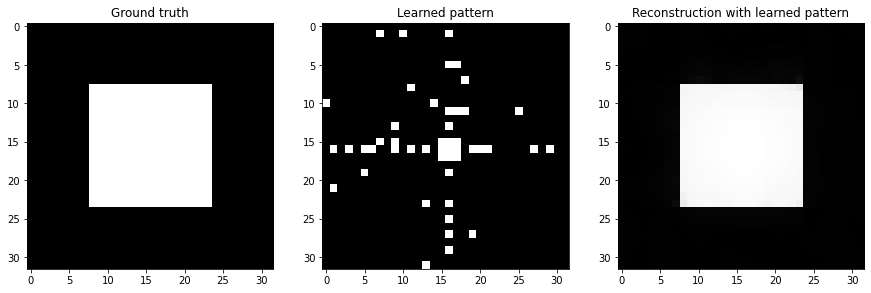

In [9]:
rcParams['figure.figsize'] = (15, 15)
subplot(1, 3, 1)
imshow(torch.sqrt(torch.sum(data['x'][0, :, :, :]**2, dim=2)), cmap='gray')
title('Ground truth')
subplot(1, 3, 2)
imshow(fftshift(result['p'][:-2].reshape(n1, n2)), cmap='gray')
title('Learned pattern')
subplot(1, 3, 3)
imshow(torch.sqrt(torch.sum(stats['recons'][0, :, :, :]**2, dim=2)), cmap='gray')
title('Reconstruction with learned pattern')